Objective: To know how to use image filtering techniques

##### Importing Dependencies and files

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

image         = cv2.imread("Images//Lenna.png")
image_RGB     = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_2D      = np.copy(image_RGB)
image_salt    = np.copy(image_RGB)
image_gauss   = np.copy(image_RGB)
image_speckle = np.copy(image_RGB)

print(f"Dimensions: {image_RGB.shape}")

Dimensions: (512, 512, 3)


 LPF helps in removing noise, blurring images.                                                                                 
 HPF filters help in finding edges in images.

##### Types of Kernels
<div>
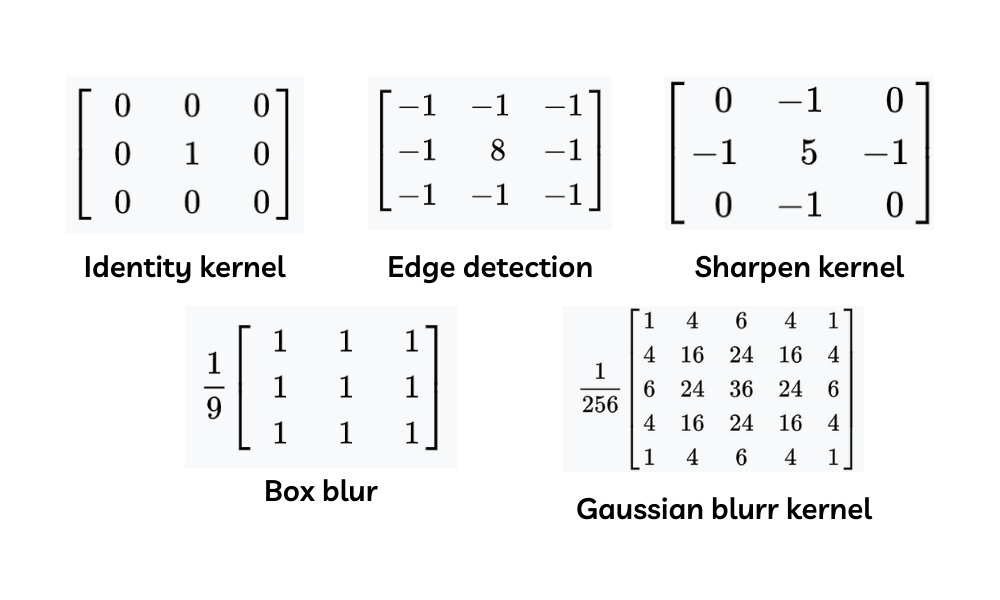
</div>

##### Noise Introduction

Speckle : a small spot or patch of colour.
<div>
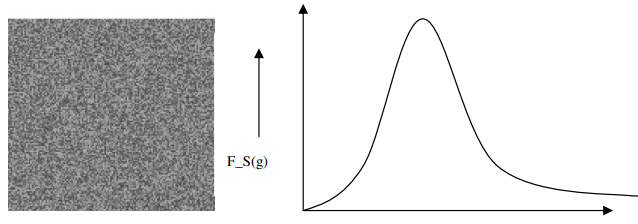
</div>
Gauss : statistical noise having a probability density function (PDF) equal to that of the normal distribution, which is also known as the Gaussian distribution
<div>
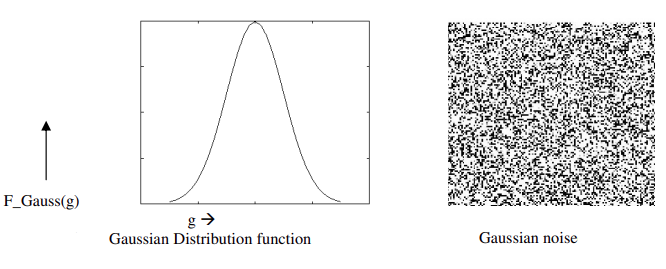
</div>
Salt & Pepper : This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.
<div>
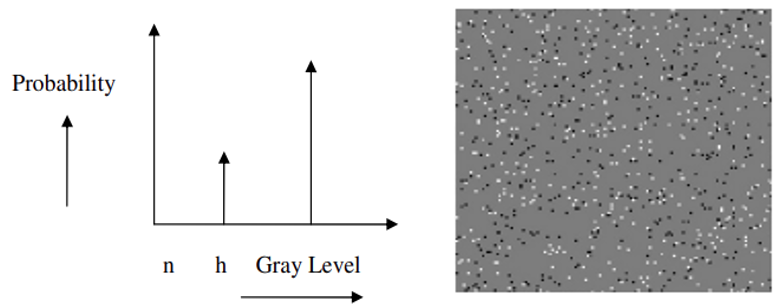
</div>
Poison :  uncertainty associated with the measurement of light, inherent to the quantized nature of light and the independence of photon detections.
<div>
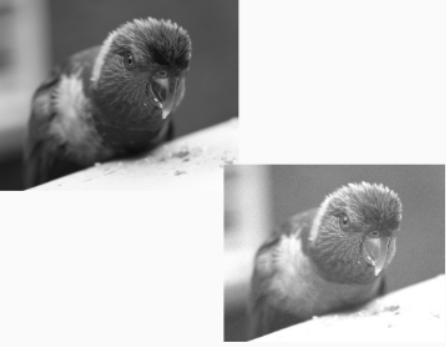
</div>

In [2]:
def noisy(noise_typ,image):
    if noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy   
    
    elif noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 400
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "salt_pepper":
        row,col,ch = image.shape
        pixel_no = random.randint(300,10000)
        for i in range(pixel_no):
            y_cord = random.randint(0, row - 1)
            x_cord = random.randint(0, col - 1)
            image[y_cord][x_cord] = 255 # color pixel to white
        for i in range(pixel_no):
            y_cord = random.randint(0, row - 1)
            x_cord = random.randint(0, col - 1)
            image[y_cord][x_cord] = 0 # color pixel to black
        return image
    
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy

##### cv2.filter2D(img, kernel_size) -> 2D Convolution - Image Filtering

Dimensions: (512, 512, 3)


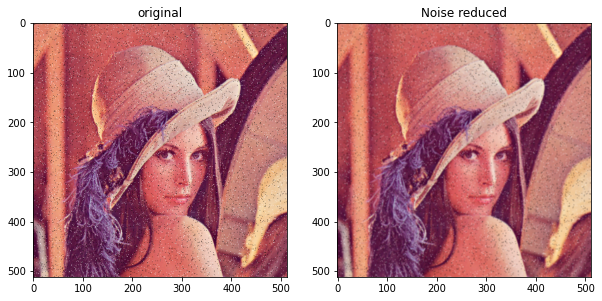

In [3]:
noise_2D = noisy('salt_pepper', image_2D)

kernel = np.ones((3,3),np.float32)/9
Filter_2D = cv2.filter2D(noise_2D,-1, kernel)

print(f"Dimensions: {noise_2D.shape}")
f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))
ax1.set_title('original')
ax2.set_title('Noise reduced')

ax1.imshow((noise_2D).astype(np.uint8))
ax2.imshow(Filter_2D.astype(np.uint8))

##### Image Blurring (Smoothning)                                             
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges).

##### 1. Averaging
It simply takes the average of all the pixels under the kernel area and replaces the central element.

Dimensions: (512, 512, 3)


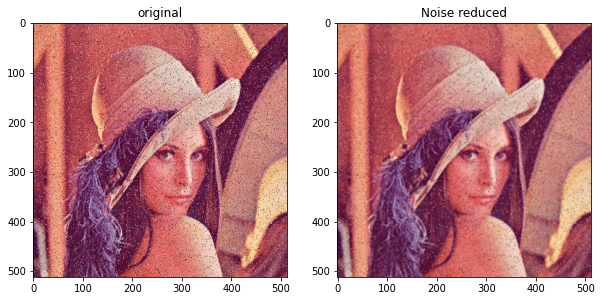

In [4]:
noise_salt = noisy('salt_pepper', image_salt)

blur = cv2.blur(noise_salt, (3,3))

print(f"Dimensions: {noise_salt.shape}")
f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,15))
ax1.set_title('original')
ax2.set_title('Noise reduced')

ax1.imshow((noise_salt).astype(np.uint8))
ax2.imshow((blur).astype(np.uint8))

##### 2. Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

Sigma controls amount of smoothning

Dimensions: (512, 512, 3)


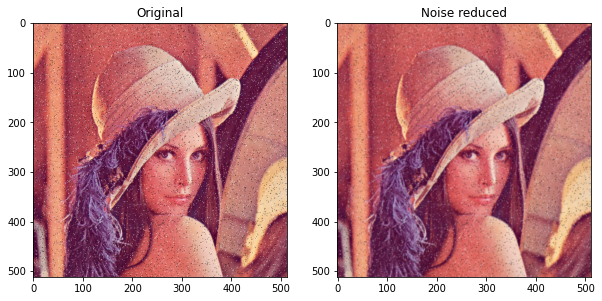

In [5]:
noise_gauss = noisy('salt_pepper',image_gauss)

Gaussian_Blur = cv2.GaussianBlur(noise_gauss, (3,3),0)

# sigma = 0.05

print(f"Dimensions: {noise_gauss.shape}")
f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))
ax1.set_title('Original')
ax2.set_title('Noise reduced')

ax1.imshow((noise_gauss).astype(np.uint8))
ax2.imshow((Gaussian_Blur).astype(np.uint8))

##### 3. Median Blur
It takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

Dimensions: (512, 512, 3)


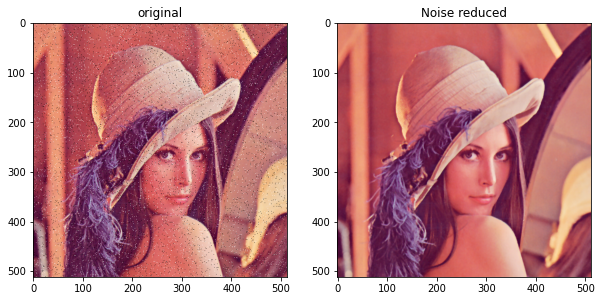

In [6]:
noise_speckle = noisy('salt_pepper', image_speckle)

median = cv2.medianBlur(noise_speckle.astype(np.float32), 3)

print(f"Dimensions: {noise_speckle.shape}")
f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,15))
ax1.set_title('original')
ax2.set_title('Noise reduced')

ax1.imshow((noise_speckle).astype(np.uint8))
ax2.imshow((median).astype(np.uint8))

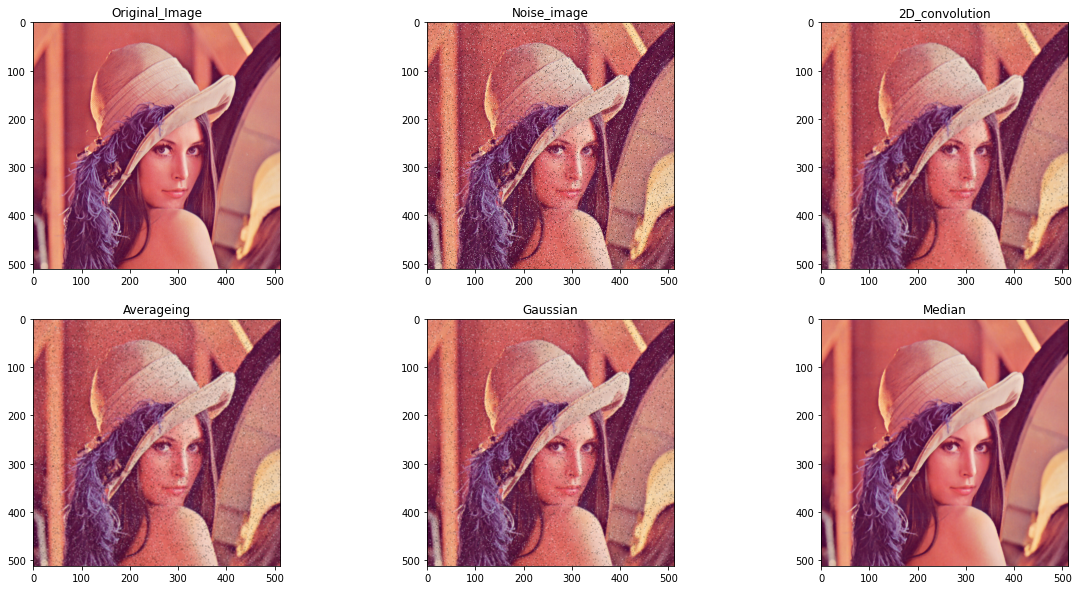

In [10]:
f, axis = plt.subplots(2, 3, figsize = (20,10))

axis[0,0].set_title('Original_Image')
axis[0,1].set_title('Noise_image')
axis[0,2].set_title('2D_convolution')
axis[1,0].set_title('Averageing')
axis[1,1].set_title('Gaussian')
axis[1,2].set_title('Median')


axis[0,0].imshow(image_RGB)
axis[0,1].imshow(image_salt)
axis[0,2].imshow(Filter_2D.astype(np.uint8))
axis[1,0].imshow((blur).astype(np.uint8))
axis[1,1].imshow((Gaussian_Blur).astype(np.uint8))
axis[1,2].imshow((median).astype(np.uint8))